Problem: Predicting Usage of a Video Game Research Server

Adiya Mittal

BACKGROUND INFORMATION

In recent years, the use of data science in gaming has become increasingly important, especially in large-scale multiplayer environments. Online games like Minecraft generate a vast amount of behavioral data as users interact with the environment, each other, and the game system itself. By analyzing this data, researchers and developers can optimize gameplay experiences, manage resources more effectively, and better understand user behavior patterns.

At the University of British Columbia (UBC), a research group led by Professor Frank Wood is conducting such a study using a dedicated Minecraft server. As players explore and interact in this shared world, their actions are continuously logged. However, managing the infrastructure to support this project poses significant logistical challenges. In particular, the research team must ensure that the server infrastructure (such as computing power and software licenses) can handle peak usage times, when many players may be active at once. Understanding when these high-demand periods occur is crucial for effective planning and resource allocation.

This brings us to the central aim of our project: predicting high-demand time windows, where the number of active players is likely to be large. By forecasting demand patterns, the team can make evidence-based decisions to scale their operations appropriately, target player recruitment, and prevent service disruptions.

The question I will address is this:

Can the hour of the day and the day of the week predict the number of active players in a given time window on the Minecraft server?

To answer this question I will be using the sessions.csv data that is provided to us. The sessions.csv data contains these following columns:
1. experience- The age of the player
2. subscribe- tells whether the person has subscribed to the game or not
3. hashedEmail- the email of the player
4. played_hours- how many hours has the players played the game
5. name- name of the player
6. gender- gender of the player
7. Age- age of the player

METHODS:
Prepocessing and exploratory data analysis
1. Import libraries and sessions.csv dataset from the internet.
2. Cleaned and tidied data to ake it usable, by converting the column start_time and end_time into date and time and I converted the time provied to us into Pacific time zone.
3. Added columns to the dataset like, start_hour, day_of_week, active_session_duration
4. Made various plots depending on the needs of questions, like finding the connection between day of the week and the duration of the active session.
5. Split the data into training and testing set and found the best K value.

FINDING THE BEST K VALUE:
1. Use recipe function to center and scale data
2. Perform the cross validation to train the classifier multiple times
3. Create the nearest neighbor model with tune()
4. Add recipe and model to workflow. Use the tune_grid() function to add the vfold_cv() and the range of K values.
5. Then testing out the best_k value on the validation set.

TESTING OUR CLASSIFIER

1. Made a new model specification for the best $k$ value chosen, combined with the recipe made earlier in a workflow, and fit the classifier to our training set.
2. Used predict on the testing set to evaluate the classifier’s predicition RMSE on data it hadn’t seen before.
3. Tested the RMSE of our classifier.

IMPORTING LIBRARIES AND PACKAGES

In [1]:
#importing the libraries
#  Visualization
library(ggplot2)

# Data manipulation
library(tibble)
library(dplyr)
library(tidyr)
library(purrr)
library(readr)

# Modelling and Preprocessing
library(tidymodels)

# Data splitting and resampling
library(rsample) # train_test_split_equivalent
library(tune) # GridSearchCV equivalent
library(workflows) #make_pipeline equivalent
library(recipes) #make_column_transformer and StandardScaler equivalent

# Metrics
library(yardstick) # for mean squared error

#Time and Dates
library(lubridate)


#formatting graphs
options(repr.plot.width=12, repr.plot.height=6)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Dig deeper into tidy modeling with R at https://www.tmwr.org


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, s

Step 2: Loading data in R

IMPORTING DATSET 

I used read_csv to import the players.csv and sessions.csv function.

In [2]:
#loading data into R
players<-read_csv("players.csv")
players
sessions<- read_csv("sessions.csv")
sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience subscribe
1   Pro         TRUE    
2   Veteran     TRUE    
3   Veteran    FALSE    
4   Amateur     TRUE    
5   Regular     TRUE    
6   Amateur     TRUE    
7   Regular     TRUE    
8   Amateur    FALSE    
9   Amateur     TRUE    
10  Veteran     TRUE    
11  Veteran     TRUE    
12  Pro         TRUE    
13  Beginner    TRUE    
14  Amateur     TRUE    
15  Veteran     TRUE    
16  Amateur    FALSE    
17  Beginner    TRUE    
18  Amateur     TRUE    
19  Amateur     TRUE    
20  Regular     TRUE    
21  Regular     TRUE    
22  Amateur    FALSE    
23  Beginner    TRUE    
24  Beginner    TRUE    
25  Amateur     TRUE    
26  Regular     TRUE    
27  Regular     TRUE    
28  Veteran    FALSE    
29  Amateur     TRUE    
30  Veteran    FALSE    
⋮   ⋮          ⋮        
167 Amateur    FALSE    
168 Beginner   FALSE    
169 Veteran     TRUE    
170 Veteran    FALSE    
171 Pro        FALSE    
172 Beginner   FALSE    
173 Veteran     TRUE    
174 Regular    FALSE    
175 Veteran     TRUE    
176 Amateur     TRUE    
177 Pro        FALSE    
178 Veteran    FALSE    
179 Amateur     TRUE    
180 Veteran     TRUE    
181 Amateur    FALSE    
182 Amateur     TRUE    
183 Pro        FALSE    
184 Amateur     TRUE    
185 Pro        FALSE    
186 Regular    FALSE    
187 Veteran     TRUE    
188 Amateur     TRUE    
189 Beginner    TRUE    
190 Amateur    FALSE    
191 Amateur     TRUE    
192 Amateur     TRUE    
193 Veteran    FALSE    
194 Amateur    FALSE    
195 Amateur    FALSE    
196 Pro         TRUE    
    hashedEmail                                                     
1   f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d
2   f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9
3   b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28
4   23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5
5   7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e
6   f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977
7   8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807
8   1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd
9   8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1
10  bbe2d83de678f519c4b3daa7265e683b4fe2d814077f9094afd11d8f217039ec
11  7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875
12  4caa42e1b20511552434978171dcf7283fb6eb857eb871327e39bfc328002309
13  4bed6f49b672974f706aa7f020b4f29020326bf594520593557cd381a51559b8
14  3caa832978e0596779f4ee7c686c4592fb6de893925025d25bf26be9a8cd03f5
15  6f9acf8ea9956fe817895c78d10e1e25c11aba335a451e5b0322b073ee5008c4
16  2313a06afe47eacc28ff55adf6f072e7d12b0d12d7cbae29656f9029ec72bb53
17  9db37a1d381697f6c83e3b97b276e38bb9d9c811ba4596edb75d4dbfea6415b0
18  a175d4741dc84e6baf77901f6e8e0a06f54809a34e6b5211159bced346f7fb3e
19  ab1f44f93c3b828f55458971db393052d9711df3e0e7ff69540bfebfcec555ff
20  20ae3f8b5323674fe6e537bc91928841cfc2a00c1b36522fd25370bb6fa89d36
21  bc704ff2bc676dbf48ee41b9e11481c1387bf758ad318f2428f336e3fecc6660
22  200db0417ee70863c7e2a0f214c737476fb86de5869d0b907a077d726357e687
23  f9ac013b2f0bc2bd4928a6a0fc8a0aae8b5c4f2670cf9e18f547b7e72034c965
24  89c8e07d6a2aa102d9cd05086d51b2e41195c9c807dd976a06f4262ff36d0cca
25  119f01b9877fc5ea0073d05602a353b91c4b48e4cf02f42bb8d661b46a34b760
26  5baba1651a0b92788bc0d6dcdf00be64af1cf9f0015bbeed204ddabd1d872e83
27  50cec73a632e4be7b155c3df5165de28b2c5baf092abcb7f509f5645776a56c2
28  f8acd26a5e452b682b9f8b20108caef1ee2e745efe08e95806980bd2388a3fea
29  4b01bce3f141289709e8278b02ba5d2aaa7105d7ccb9c7deb37670a80e332774
30  951e54f7376e2b2f0915e9e3646c701af4a2fe839385b13f9e0084b08f8070bd
⋮   ⋮                                                               
167 7096b30972a32029244fc6171f21bc5996b51b8d75df7a94f003dead428988f9
168 42eafe96ed5c1684e3b5cc614d1b01a117173d3ec6898abcf1177d9822bd39f7
169 9ba67e127e4e70d909f6237644bb4674b17bc6ae5c9e735f88cfc50e22b499c6
170 4bfad3613c71ace05644bf210195d9fb0d3

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail                                                     
1    bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
2    36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
3    f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc
4    bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
5    36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
6    bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
7    fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d
8    ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83
9    96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f
10   36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
11   fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d
12   f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc
13   f2826fb8dbce4d450348f99cb27ade184b713998d9679780442efaaf218038f2
14   b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319
15   24d4892c2c3ce11d3e54c3bf31ee218901cac7a2f564911d67424c8fdf0874fe
16   fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d
17   88247d9a46fc214a12485dcbcbb03a8ddebfe8c1ec5fe209cd660147625c8e62
18   f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d
19   36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
20   fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d
21   bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
22   36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
23   fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d
24   ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83
25   ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83
26   fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d
27   36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
28   bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
29   b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319
30   fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d
⋮    ⋮                                                               
1506 ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83
1507 bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
1508 bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
1509 b3510c708bd50bf9f75e6e02bb6fe14edb705e0ea671ee769a45c613750e8b58
1510 bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
1511 e74c60a92c0100e7240be56d66969db85856152b048c639331a3595f901461ae
1512 b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319
1513 f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc
1514 e74c60a92c0100e7240be56d66969db85856152b048c639331a3595f901461ae
1515 fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d
1516 f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc
1517 a1e0438d568b9c05a93cadaf99969e4d44794d19dea31edd723cbc916f878c33
1518 fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d
1519 36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
1520 55d24216db39c27e1f17cc43d3127cbf8ed76ada6d098202b53ded319855e2c1
1521 f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc
1522 b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319
1523 b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319
1524 f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc
1525 fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d
1526 18936844e06b6c7871dce06384e2d142dd86756941641ef39cf40a9967ea14e3
1527 f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc
1528 18936844e06b6c7871dce06384e2d142dd86756941641ef39cf40a9967ea14e3
1529 f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc
1530 b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319
1531 36d9cbb4c6

CLEANING AND TIDYING DATA

First, I wanted t convert the start_time and end_time into a differnt forma, where the time is expressed in the 24 hour clock. This helps me to differentiate the time and to reduct the chances of R getting the confuse of whether I was talking about the morning time period or the evening time period.

Second, I wanted to convert the time into Pacific time, so that is it interpretable.

In [3]:
# CONVERT START_TIME AND END_TIME TO DATETIME
sessions<-sessions|>
mutate( start_time= dmy_hm(start_time), end_time= dmy_hm(end_time))
sessions

hashedEmail                                                     
1    bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
2    36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
3    f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc
4    bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
5    36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
6    bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
7    fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d
8    ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83
9    96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f
10   36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
11   fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d
12   f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc
13   f2826fb8dbce4d450348f99cb27ade184b713998d9679780442efaaf218038f2
14   b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319
15   24d4892c2c3ce11d3e54c3bf31ee218901cac7a2f564911d67424c8fdf0874fe
16   fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d
17   88247d9a46fc214a12485dcbcbb03a8ddebfe8c1ec5fe209cd660147625c8e62
18   f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d
19   36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
20   fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d
21   bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
22   36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
23   fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d
24   ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83
25   ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83
26   fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d
27   36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
28   bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
29   b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319
30   fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d
⋮    ⋮                                                               
1506 ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83
1507 bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
1508 bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
1509 b3510c708bd50bf9f75e6e02bb6fe14edb705e0ea671ee769a45c613750e8b58
1510 bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
1511 e74c60a92c0100e7240be56d66969db85856152b048c639331a3595f901461ae
1512 b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319
1513 f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc
1514 e74c60a92c0100e7240be56d66969db85856152b048c639331a3595f901461ae
1515 fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d
1516 f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc
1517 a1e0438d568b9c05a93cadaf99969e4d44794d19dea31edd723cbc916f878c33
1518 fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d
1519 36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
1520 55d24216db39c27e1f17cc43d3127cbf8ed76ada6d098202b53ded319855e2c1
1521 f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc
1522 b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319
1523 b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319
1524 f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc
1525 fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d
1526 18936844e06b6c7871dce06384e2d142dd86756941641ef39cf40a9967ea14e3
1527 f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc
1528 18936844e06b6c7871dce06384e2d142dd86756941641ef39cf40a9967ea14e3
1529 f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc
1530 b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319
1531 36d9cbb4c6

In [4]:
#CONVERT THE TIMEZONE FROM GMT TO PST
sessions <- sessions |>
  mutate(
    start_time = with_tz(force_tz(start_time, tzone = "GMT"), tzone = "America/Los_Angeles"),
    end_time = with_tz(force_tz(end_time, tzone = "GMT"), tzone = "America/Los_Angeles")
  )
sessions 


hashedEmail                                                     
1    bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
2    36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
3    f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc
4    bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
5    36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
6    bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
7    fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d
8    ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83
9    96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f
10   36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
11   fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d
12   f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc
13   f2826fb8dbce4d450348f99cb27ade184b713998d9679780442efaaf218038f2
14   b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319
15   24d4892c2c3ce11d3e54c3bf31ee218901cac7a2f564911d67424c8fdf0874fe
16   fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d
17   88247d9a46fc214a12485dcbcbb03a8ddebfe8c1ec5fe209cd660147625c8e62
18   f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d
19   36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
20   fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d
21   bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
22   36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
23   fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d
24   ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83
25   ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83
26   fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d
27   36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
28   bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
29   b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319
30   fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d
⋮    ⋮                                                               
1506 ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83
1507 bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
1508 bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
1509 b3510c708bd50bf9f75e6e02bb6fe14edb705e0ea671ee769a45c613750e8b58
1510 bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
1511 e74c60a92c0100e7240be56d66969db85856152b048c639331a3595f901461ae
1512 b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319
1513 f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc
1514 e74c60a92c0100e7240be56d66969db85856152b048c639331a3595f901461ae
1515 fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d
1516 f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc
1517 a1e0438d568b9c05a93cadaf99969e4d44794d19dea31edd723cbc916f878c33
1518 fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d
1519 36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
1520 55d24216db39c27e1f17cc43d3127cbf8ed76ada6d098202b53ded319855e2c1
1521 f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc
1522 b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319
1523 b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319
1524 f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc
1525 fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d
1526 18936844e06b6c7871dce06384e2d142dd86756941641ef39cf40a9967ea14e3
1527 f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc
1528 18936844e06b6c7871dce06384e2d142dd86756941641ef39cf40a9967ea14e3
1529 f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc
1530 b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319
1531 36d9cbb4c6

WRANGLING DATA

To understand what the data set sessions brought us in form information, I extracted multiple things from the data:
1. created an hourly time range
2. then counted how many active sessions were present in each hour of the day
3. extracting which day of the week were the session happening
4. and lastly seperately extracting the amonut of sessions that happened on each day of the weekday amd weekend.

In [5]:
#Creating an hourly time range
hours<- seq(from= floor_date(min(sessions$start_time, na.rm = TRUE), unit= "hour"), 
            to = ceiling_date(max(sessions$end_time, na.rm = TRUE), unit= "hour"), 
            by="1 hour")
head(hours)

[1] "2024-04-06 02:00:00 PDT" "2024-04-06 03:00:00 PDT"
[3] "2024-04-06 04:00:00 PDT" "2024-04-06 05:00:00 PDT"
[5] "2024-04-06 06:00:00 PDT" "2024-04-06 07:00:00 PDT"

In [6]:
#Count how many sessions are active during each hour
concurrent_sessions<-map_dfr(hours, function(h){
active_players <- sum(sessions$start_time <= h & sessions$end_time >= h)
tibble( time=h, active_sessions = active_players)})
head(concurrent_sessions)

time                active_sessions
1 2024-04-06 02:00:00 0              
2 2024-04-06 03:00:00 1              
3 2024-04-06 04:00:00 0              
4 2024-04-06 05:00:00 0              
5 2024-04-06 06:00:00 0              
6 2024-04-06 07:00:00 0

In [7]:
#Extracting day of week
concurrent_sessions <- concurrent_sessions|>
mutate(day_of_week =wday(time, label = TRUE, abbr = FALSE))
concurrent_sessions

time                active_sessions day_of_week
1    2024-04-06 02:00:00 0               Saturday   
2    2024-04-06 03:00:00 1               Saturday   
3    2024-04-06 04:00:00 0               Saturday   
4    2024-04-06 05:00:00 0               Saturday   
5    2024-04-06 06:00:00 0               Saturday   
6    2024-04-06 07:00:00 0               Saturday   
7    2024-04-06 08:00:00 0               Saturday   
8    2024-04-06 09:00:00 0               Saturday   
9    2024-04-06 10:00:00 0               Saturday   
10   2024-04-06 11:00:00 0               Saturday   
11   2024-04-06 12:00:00 0               Saturday   
12   2024-04-06 13:00:00 0               Saturday   
13   2024-04-06 14:00:00 1               Saturday   
14   2024-04-06 15:00:00 1               Saturday   
15   2024-04-06 16:00:00 1               Saturday   
16   2024-04-06 17:00:00 0               Saturday   
17   2024-04-06 18:00:00 0               Saturday   
18   2024-04-06 19:00:00 0               Saturday   
19   2024-04-06 20:00:00 1               Saturday   
20   2024-04-06 21:00:00 0               Saturday   
21   2024-04-06 22:00:00 0               Saturday   
22   2024-04-06 23:00:00 2               Saturday   
23   2024-04-07 00:00:00 0               Sunday     
24   2024-04-07 01:00:00 0               Sunday     
25   2024-04-07 02:00:00 0               Sunday     
26   2024-04-07 03:00:00 0               Sunday     
27   2024-04-07 04:00:00 0               Sunday     
28   2024-04-07 05:00:00 0               Sunday     
29   2024-04-07 06:00:00 0               Sunday     
30   2024-04-07 07:00:00 0               Sunday     
⋮    ⋮                   ⋮               ⋮          
4123 2024-09-24 20:00:00 NA              Tuesday    
4124 2024-09-24 21:00:00 NA              Tuesday    
4125 2024-09-24 22:00:00 NA              Tuesday    
4126 2024-09-24 23:00:00 NA              Tuesday    
4127 2024-09-25 00:00:00 NA              Wednesday  
4128 2024-09-25 01:00:00 NA              Wednesday  
4129 2024-09-25 02:00:00 NA              Wednesday  
4130 2024-09-25 03:00:00 NA              Wednesday  
4131 2024-09-25 04:00:00 NA              Wednesday  
4132 2024-09-25 05:00:00 NA              Wednesday  
4133 2024-09-25 06:00:00 NA              Wednesday  
4134 2024-09-25 07:00:00 NA              Wednesday  
4135 2024-09-25 08:00:00 NA              Wednesday  
4136 2024-09-25 09:00:00 NA              Wednesday  
4137 2024-09-25 10:00:00 NA              Wednesday  
4138 2024-09-25 11:00:00 NA              Wednesday  
4139 2024-09-25 12:00:00 NA              Wednesday  
4140 2024-09-25 13:00:00 NA              Wednesday  
4141 2024-09-25 14:00:00 NA              Wednesday  
4142 2024-09-25 15:00:00 NA              Wednesday  
4143 2024-09-25 16:00:00 NA              Wednesday  
4144 2024-09-25 17:00:00 NA              Wednesday  
4145 2024-09-25 18:00:00 NA              Wednesday  
4146 2024-09-25 19:00:00 NA              Wednesday  
4147 2024-09-25 20:00:00 NA              Wednesday  
4148 2024-09-25 21:00:00 NA              Wednesday  
4149 2024-09-25 22:00:00 NA              Wednesday  
4150 2024-09-25 23:00:00 NA              Wednesday  
4151 2024-09-26 00:00:00 NA              Thursday   
4152 2024-09-26 01:00:00 NA              Thursday

In [8]:
# Create weekday sessions
weekday_sessions <-concurrent_sessions|>
filter(day_of_week %in% c ("Monday", "Tuesday", "Wednesday", "Thursday", "Friday"))|>
mutate( day_of_end ="weekday")
head(weekday_sessions)

time                active_sessions day_of_week day_of_end
1 2024-04-08 00:00:00 0               Monday      weekday   
2 2024-04-08 01:00:00 0               Monday      weekday   
3 2024-04-08 02:00:00 0               Monday      weekday   
4 2024-04-08 03:00:00 0               Monday      weekday   
5 2024-04-08 04:00:00 0               Monday      weekday   
6 2024-04-08 05:00:00 0               Monday      weekday

In [9]:
# Create weekend sessions
weekend_sessions <- concurrent_sessions |>
  filter(day_of_week %in% c("Saturday", "Sunday")) |>
  mutate(day_or_end = "weekend")
head( weekend_sessions)

time                active_sessions day_of_week day_or_end
1 2024-04-06 02:00:00 0               Saturday    weekend   
2 2024-04-06 03:00:00 1               Saturday    weekend   
3 2024-04-06 04:00:00 0               Saturday    weekend   
4 2024-04-06 05:00:00 0               Saturday    weekend   
5 2024-04-06 06:00:00 0               Saturday    weekend   
6 2024-04-06 07:00:00 0               Saturday    weekend

In [10]:
# Calculate sessions duration 
sessions_durations <- sessions |>
  mutate(
    play_duration_minutes = as.numeric(difftime(end_time, start_time, units = "mins")),
    day_of_week = wday(start_time, label = TRUE, abbr = FALSE),
    start_hour = hour(start_time),
    start_time_of_day = hour(start_time) + minute(start_time) / 60
  ) |>
  filter(play_duration_minutes > 0)
head(sessions_durations)

hashedEmail                                                     
1 bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
2 36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
3 f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc
4 bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
5 36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
6 bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
  start_time          end_time            original_start_time original_end_time
1 2024-06-30 11:12:00 2024-06-30 11:24:00 1.71977e+12         1.71977e+12      
2 2024-06-17 16:33:00 2024-06-17 16:46:00 1.71867e+12         1.71867e+12      
3 2024-07-25 10:34:00 2024-07-25 10:57:00 1.72193e+12         1.72193e+12      
4 2024-07-24 20:22:00 2024-07-24 20:58:00 1.72188e+12         1.72188e+12      
5 2024-05-25 09:01:00 2024-05-25 09:12:00 1.71665e+12         1.71665e+12      
6 2024-06-23 08:08:00 2024-06-23 10:10:00 1.71916e+12         1.71916e+12      
  play_duration_minutes day_of_week start_hour start_time_of_day
1  12                   Sunday      11         11.200000        
2  13                   Monday      16         16.550000        
3  23                   Thursday    10         10.566667        
4  36                   Wednesday   20         20.366667        
5  11                   Saturday     9          9.016667        
6 122                   Sunday       8          8.133333

LOOKING AT DIFFERENT VARIABLE USING DIFFERNT PLOTS:

1. Concurrent sessions by hour- This plot shows the relationship between the hour of the day (24 hour clock) and the number of active sessions during each hour. I presented ths in the form of a bar plot because I wanted to compare different number of sessions. We see that later hours of the day have more active sessions.

2. Day of the week by active sessions- This plot shows the relationship between the day of the week and the number of active sessions during each day. I presented ths in the form of a bar plot because I wanted to compare different number of sessions on each day. The conclusion can be made that Saturday and Sunday have most active sessions and are more busier that weekdays.

3. Concurrent sessions by day and hour- This plot shows the relationship between the day of the week,hour of the day and the number of active sessions during each day. I presented ths in the form of a bar plot because I wanted to compare different number of sessions on each day and each hour.

4. Start time vs duration- This plot shows the relationship between the start time of the active session and the duration of minutes it continues. I presented ths in the form of a scatter plot because of the comparison between two independent quantities.

5. Duration vs day of the week-  This plot shows the relationship between the day of the week and the duration of each session. I presented this in the form of a bar plot because I wanted to compare the durations on each day. The conclusion can be made that Saturday and Friday host longer duration session.

Warning message:
“Removed 711 rows containing missing values or values outside the scale range
(`geom_bar()`).”


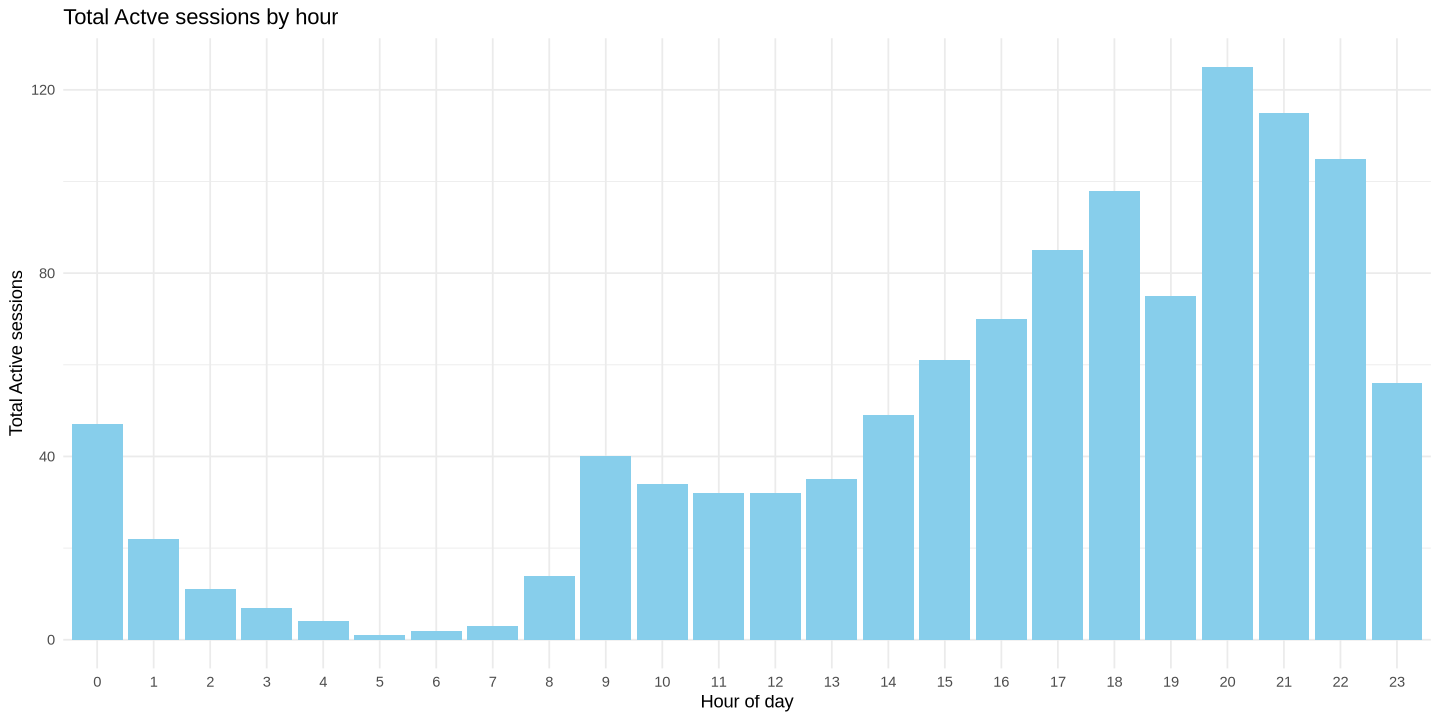

In [11]:
#Show concurrent sessions by hour and the plot

concurrent_sessions<- concurrent_sessions|>
mutate(hour= hour(time))

total_sessions_plot<- ggplot(concurrent_sessions, aes(x= factor(hour), y= active_sessions))+
geom_bar(stat= "identity", fill="skyblue")+
labs(
title="Total Actve sessions by hour",
x="Hour of day",
y="Total Active sessions")+
theme_minimal()
total_sessions_plot

Warning message:
“Removed 711 rows containing missing values or values outside the scale range
(`geom_bar()`).”


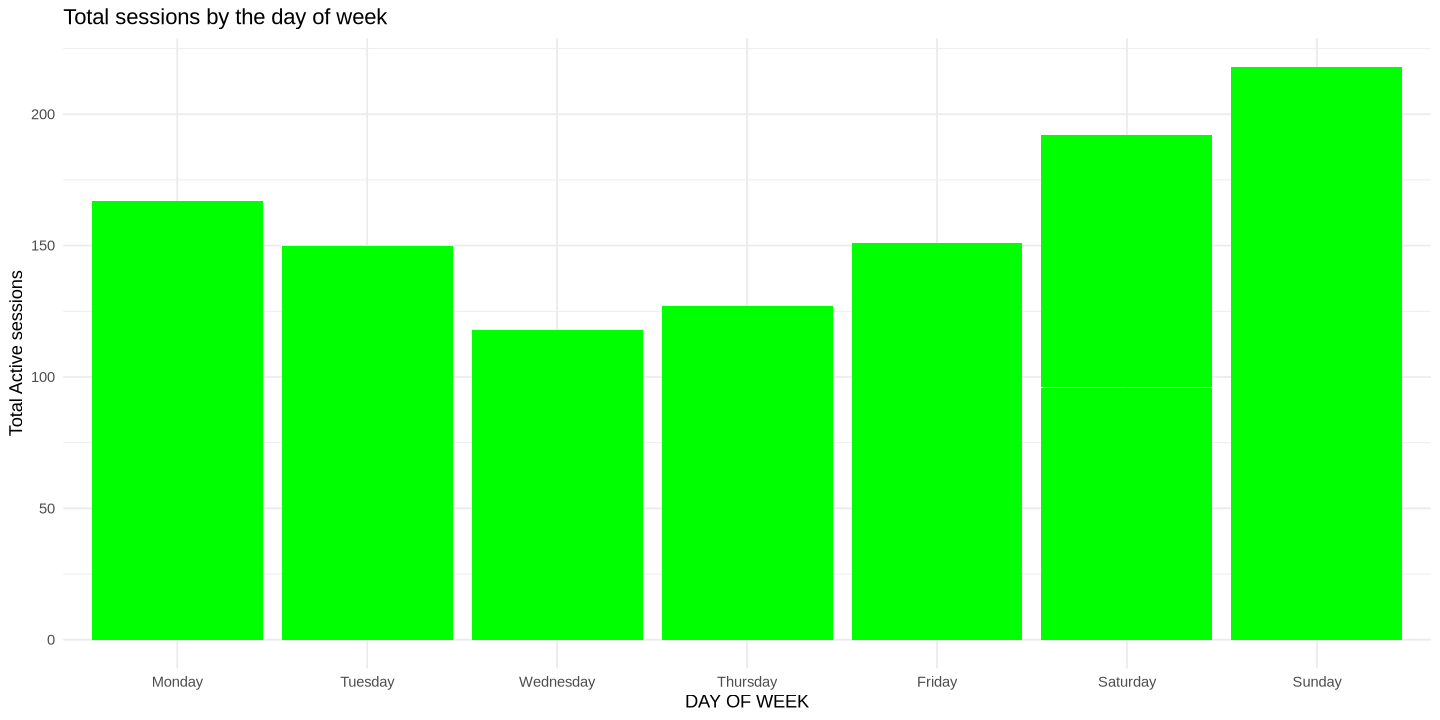

In [12]:
# Day of the week exploratory plot

concurrent_sessions<- concurrent_sessions|>
mutate( day_of_week= factor (day_of_week , levels= c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")))
                                                      
dayofweek_exploratory_plot<- ggplot(concurrent_sessions, aes(x= day_of_week, y= active_sessions))+
geom_bar(stat= "identity", fill="green")+
labs(
title="Total sessions by the day of week",
x="DAY OF WEEK",
y="Total Active sessions")+
theme_minimal()
dayofweek_exploratory_plot


Warning message:
“Removed 711 rows containing missing values or values outside the scale range
(`geom_bar()`).”


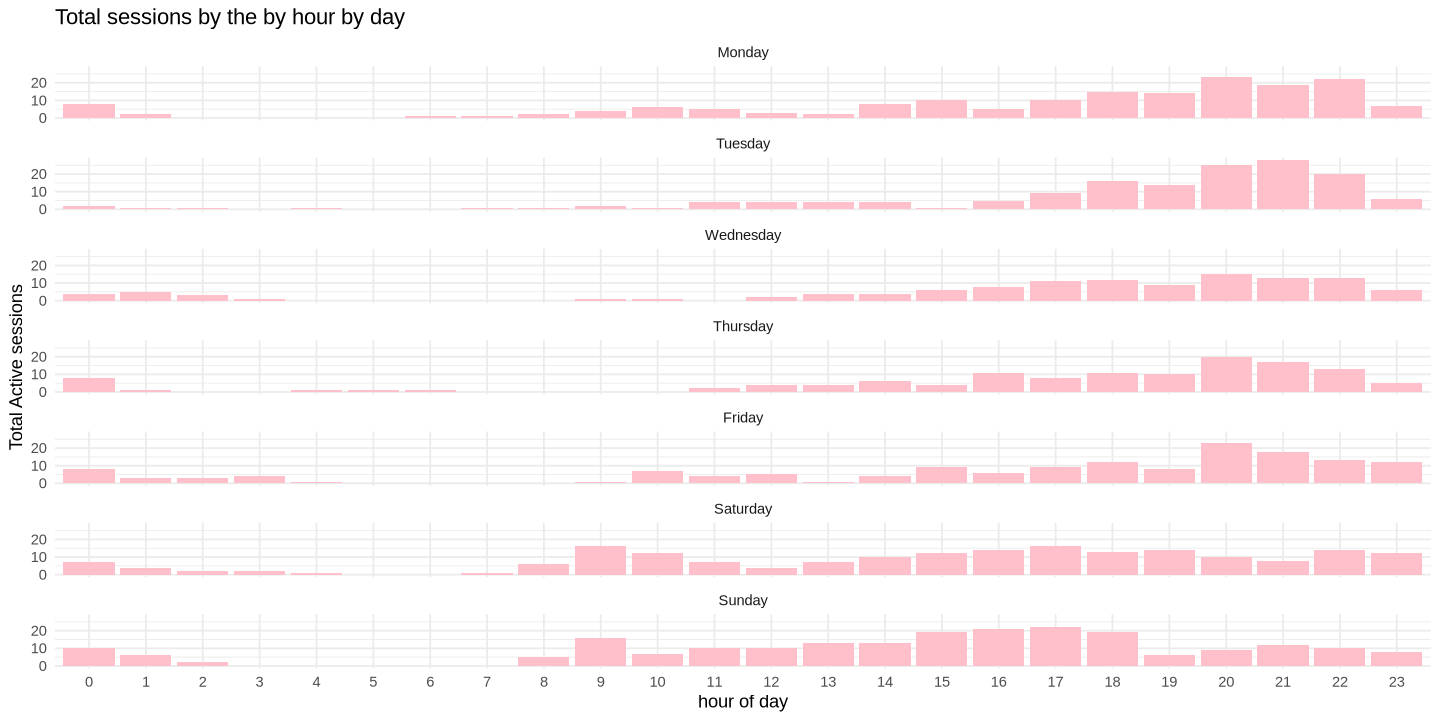

In [13]:
#Show concurrent sessions by hour and day of week

concurrent_sessions<- concurrent_sessions|>
mutate(
hour=hour(time),
day_of_week= factor (day_of_week , levels= c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")))

Total_sessions_dayofweek <- ggplot(concurrent_sessions, aes(x=factor(hour), y= active_sessions))+
geom_bar(stat= "identity", fill="pink")+
facet_wrap(~ day_of_week, ncol=1)+
labs(
title="Total sessions by the by hour by day",
x="hour of day",
y="Total Active sessions")+
theme_minimal()
Total_sessions_dayofweek



hashedEmail                                                     
1 bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
2 36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
3 f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc
4 bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
5 36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
6 bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
  start_time          end_time            original_start_time original_end_time
1 2024-06-30 11:12:00 2024-06-30 11:24:00 1.71977e+12         1.71977e+12      
2 2024-06-17 16:33:00 2024-06-17 16:46:00 1.71867e+12         1.71867e+12      
3 2024-07-25 10:34:00 2024-07-25 10:57:00 1.72193e+12         1.72193e+12      
4 2024-07-24 20:22:00 2024-07-24 20:58:00 1.72188e+12         1.72188e+12      
5 2024-05-25 09:01:00 2024-05-25 09:12:00 1.71665e+12         1.71665e+12      
6 2024-06-23 08:08:00 2024-06-23 10:10:00 1.71916e+12         1.71916e+12      
  play_duration_minutes day_of_week start_hour start_time_of_day
1  12                   Sunday      11         11.200000        
2  13                   Monday      16         16.550000        
3  23                   Thursday    10         10.566667        
4  36                   Wednesday   20         20.366667        
5  11                   Saturday     9          9.016667        
6 122                   Sunday       8          8.133333

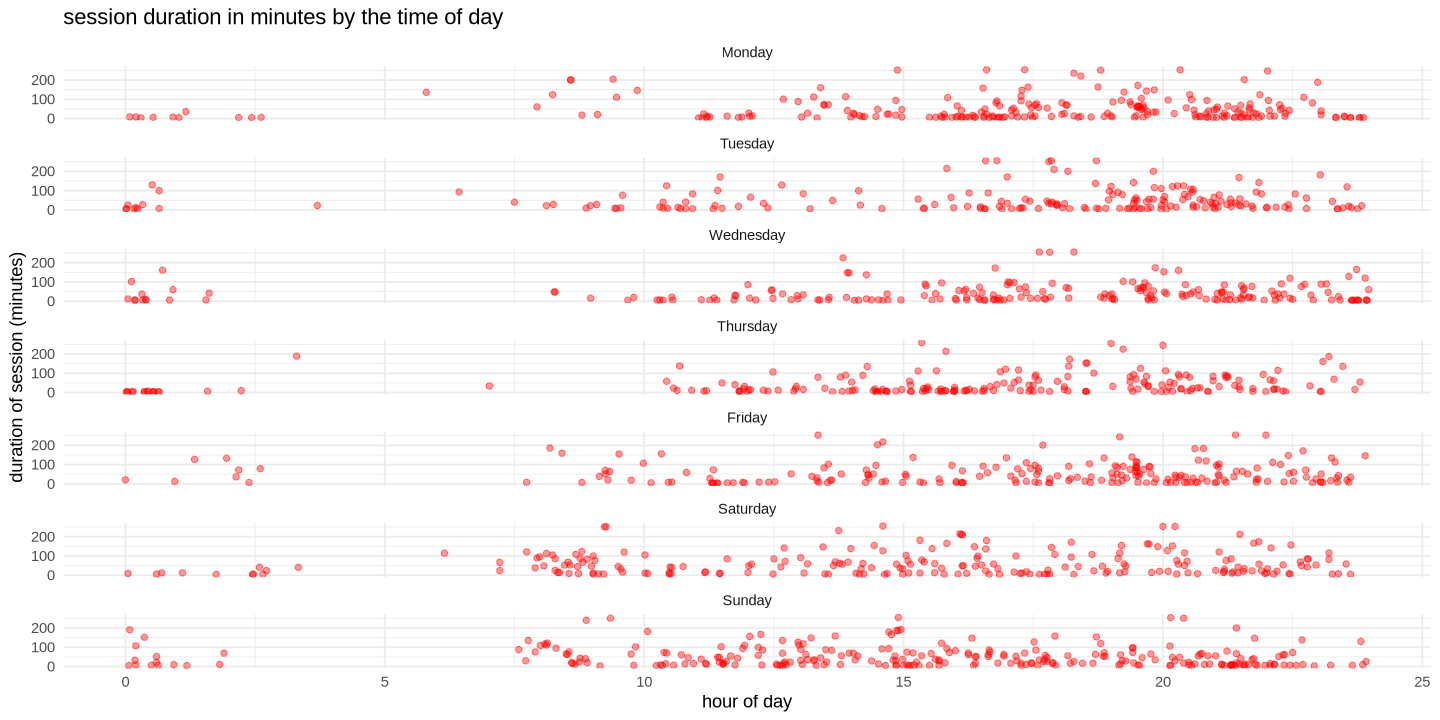

In [14]:
#Scatter plot of start_time_of_day vs. play_duration_minutes
sessions_durations <-sessions_durations |>
mutate(
 day_of_week= factor (day_of_week , levels= c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")))
head(sessions_durations)

duration_scatter <- ggplot(sessions_durations , aes(x=start_time_of_day , y= play_duration_minutes ))+
geom_point( alpha= 0.4, color="red")+
facet_wrap(~ day_of_week, ncol=1)+
labs(
title="session duration in minutes by the time of day",
x="hour of day",
y="duration of session (minutes)")+
theme_minimal()
duration_scatter

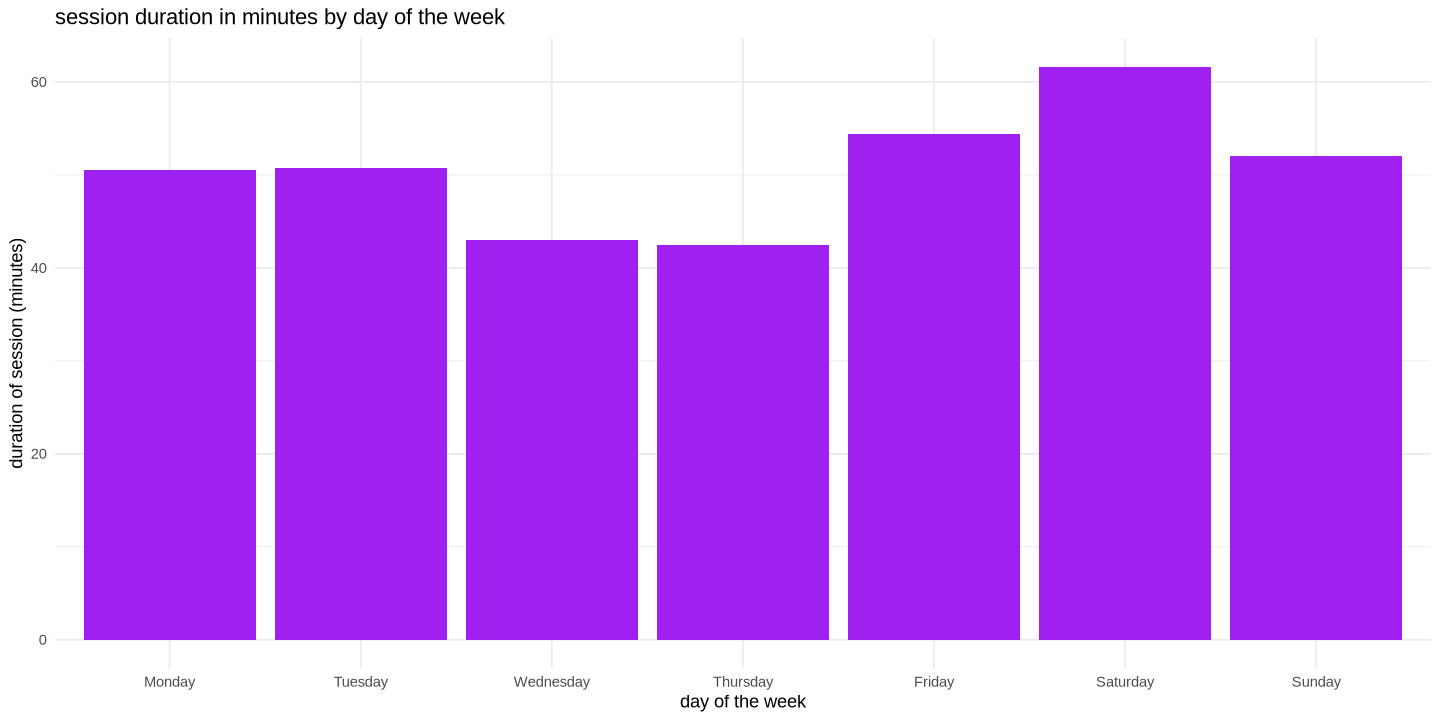

In [15]:
#Bar chart play duration minutes vs day of the week 
avg_duration <- sessions_durations|>
group_by(day_of_week)|>
summarize(avg_play_duration = mean ( play_duration_minutes, na.rm= TRUE))

duration_bar <- ggplot(avg_duration , aes(x= day_of_week  , y= avg_play_duration))+
geom_col( fill="purple")+
labs(
title="session duration in minutes by day of the week",
x="day of the week",
y="duration of session (minutes)")+
theme_minimal()
duration_bar

ANALYSIS OF HOURS REGARDLESS OF WEEK

SPLITTING OUR DATA INTO TRAINING AND TESTING SET

Before working on our model, I need to split our data into training and testing sets. 

Using initial_split to split our dataframe into 75% training and 25% testing, since it shuffles our data for us and ensures an constant proportion of each class is present in both. The 75-25 split allows us to train our model on as many data points as possible while also keeping enough data for effective testing later.

In [16]:
#Training and testing split 
set.seed(2000)

split_obj<- initial_split( concurrent_sessions, prop= 0.75)

sessions_train <- training(split_obj)
sessions_test <- testing(split_obj)

x_train <- sessions_train|>
select(hour)
head(x_train)

y_train<- sessions_train|>
pull(active_sessions)
head(y_train)

x_test <- sessions_test|>
select(hour)
head(x_test)

y_test<- sessions_test|>
pull(active_sessions)
head(y_test)

hour
1 23  
2 22  
3 16  
4 14  
5 20  
6 10

[1]  0 NA NA  1  2  0

hour
1  2  
2  6  
3  8  
4  9  
5 11  
6 16

[1] 0 0 0 0 0 1

In the above code, I split the data into a training set to build my model on, and a testing set to test it. Using initial_split allowed me to shuffle the data before splitting (removing bias and order) and stratify the data by diag so that an equal proportion of each is in each set.

FINDING THE BEST K VALUE

CREATING THE MODEL

To create our model, these steps will be followed:

Create a recipe that uses hour (predictor variable) to predict active sessions
   
Create a specification that uses k-nearest neighbors, with neighbors = tune() to perform cross-validation.

Split the data into 5 equally sized chunks, known as folds.

Create a workflow combining the first 2 steps, with tune_grid instead of fit.

Repeat for each validation set for values of 1 ≤ $k$ ≤ 49

In [17]:
# KNN- regression
knn_recipe <- recipe(active_sessions ~ hour, data = sessions_train) |>
  step_scale(all_predictors())|>
  step_center(all_predictors())

# Model specification
knn_spec <- nearest_neighbor( mode = "regression", neighbors = tune() )|>
  set_engine("kknn")

# Workflow
knn_workflow <- workflow() |>
  add_recipe(knn_recipe) |>
  add_model(knn_spec)

# Tuning grid: neighbors 1 to 49
knn_grid <- tibble(neighbors = 1:49)

# Resampling setup: 5-fold CV
set.seed(2000)
folds <- vfold_cv(sessions_train, v = 5)

# Tune the model
knn_tuned <- tune_grid( knn_workflow,
  resamples = folds,
  grid = knn_grid,
  metrics = metric_set(rmse) )

# Get best model
best_knn <- knn_tuned |>
 select_best("rmse")

# Finalize workflow with best number of neighbors
final_knn_workflow <- knn_workflow |>
  finalize_workflow(best_knn)

# Fit on full training data
final_knn_fit <- final_knn_workflow |>
  fit(data = sessions_train)

# Predict on test data
predictions <- predict(final_knn_fit, sessions_test) |>
  bind_cols(sessions_test)

# Calculate RMSE
rmse(predictions, truth = active_sessions, estimate = .pred)

.metric .estimator .estimate
1 rmse    standard   0.6720252

In [27]:
# best rmse
knn_tuned<-tune_grid(knn_workflow, resamples=folds, grid=knn_grid, metrics=metric_set(rmse))
y_train<-pull(sessions_train, active_sessions)
y_train

[1]  0 NA NA  1  2  0  0  0  0  0  0  2  0  0  0  1  1  0  1  1  0  0 NA  1
  [25]  0  0  2  0  0  0  0  0 NA  0  3  0  0  0 NA NA NA  0  0  1  0 NA  1 NA
  [49]  0  2  0  0  0  0  0  1  1 NA  0  2 NA  0  0  1  1  1  0  2  0  0  1  0
  [73]  0  0  1 NA  0  0  1 NA NA  0  0 NA  0  0  0  0  0  0  0  0  0  0  0  1
  [97]  0  0  2  0  0  1  0  0  0  1  0  0  0  0  0  1  0  1  0  3  0  4  1  2
 [121]  0  1  0 NA  0  0  0  0 NA  0  0 NA  0  0  0  0  0  0  0  1  0  0  1  1
 [145]  0  0  0  0  1 NA  0  1  0  0  0  0  0  0  0  0 NA  0  0  1  0  0  0 NA
 [169]  0  1  0  2  0 NA  1  0  0  0  2  0  1  0  1  0  0 NA  1  0  0  1  0  0
 [193]  0  0  0  0  0  0 NA  0  1  0  0  1  0  0  0  0  0  0  1  0  2  0 NA  1
 [217]  1  0  0  0 NA  0 NA  1 NA  0  0  0  0  0  0  0  0  0 NA  0  5  0 NA  0
 [241]  0  0  0  0  1  0  0  2  0  0 NA  2  1  1  0  0 NA  0  0  0  0  0  1  0
 [265]  1  0  0  1  0  0 NA  0 NA  0  0  0  3  1  0  1  0  0 NA  1  0 NA  0  0
 [289]  0 NA  0  0 NA  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0
 [313]  0  0  2  0  0  0  1 NA NA  0  0 NA  0  0  0  0  0  0  0  0  0  1  0 NA
 [337]  0 NA  0  0 NA NA  0  1  0  0  0  3 NA  0  3  0  0  1  0  0  0 NA  0  0
 [361] NA  0  0 NA  0 NA NA  1 NA  0  0  0  0  0 NA NA NA  0  0  0 NA NA  0  3
 [385]  0  1  0  0 NA  2 NA NA  0  1  3  0  0  0  0 NA  0  0  1  1  0 NA  2  2
 [409]  0  0 NA  0  0  2  0 NA NA  0  0  0  0  1 NA  0  0  2 NA  0  0  0  0 NA
 [433]  0  1  0  0  0  0  0  0  0  2  0  0  0  0  1  0  0  0  2 NA  0  0  0  0
 [457]  0  1 NA  0  0  1  0  0  0  0  0 NA  0 NA  2  1  1 NA  2  0  0 NA NA  0
 [481]  0  0  0  0 NA  0  3  0  0  0  0  0 NA  0  0  0 NA NA  0 NA NA  0  1  2
 [505]  0  0  0  0  0 NA  0  0  0  1  0  0  0  0  0  0  1  0  0  0  0 NA  0  0
 [529]  0  0  0  2  0  0  0  1  1  0  0  1  2 NA  0  0  0  0 NA  1  0 NA  0  0
 [553] NA  0  0  0  0  0  0  1  1  0  0  0  0  0  0  1 NA  0  0  0 NA  1  0  1
 [577]  3  0  0  0  1  0  0  0  0 NA  0  1  0  0  3  0 NA  1 NA  0  0  1  0  0
 [601]  0  0 NA NA  2  0  0  0  0  0  1  0  1  0  0  1  0  2  0  0 NA  0 NA  0
 [625]  0  1  0  0  0  0  0  0  0 NA  0 NA  0  0  0 NA  0  0  0  0  0  0 NA  0
 [649]  0  0  1  0  0  1  0  0  0  0  0  0 NA  0 NA  0  0  0  0 NA  0  0 NA  0
 [673]  0  0  0  0  1  1  0 NA  0  0 NA  2  0  1  1  0  0  0  0 NA NA  0  4 NA
 [697]  2  1  1  1  0  0  0  0  0  0  1  2  0 NA  1  1  2  0  0  1  1  0 NA  1
 [721]  0 NA  0  0  0 NA  0 NA NA  0  0  0  0 NA  0  0  0  0  1  0  0  0  0  0
 [745] NA  0  0  0  0 NA  0  0  0  0  3  0  0  1  0  0  0  0 NA  1  1  0  0  0
 [769]  0  0  0  0 NA  1  0  0  0  6  0  0  0  0  0  1  1  0  0  0  0  0  0  1
 [793]  1  0  0  1  0  0  0 NA  0  0  1 NA  0  0  0  0  1  0  1  0  0 NA  0  0
 [817]  0  1  0  0  0  0  1  0 NA  0 NA  0  0  0  1  0  0  0  0  0  2  0  0 NA
 [841]  0  0  0  0  0  1  0 NA  0  1  1  0  0  2  0 NA  0  1  0  0  0 NA NA  0
 [865]  0 NA  1  0  0  1  0  0 NA NA  2  0 NA  0  0  0  0  0  0  1  1  0  0  1
 [889]  0 NA  0  1 NA NA  0  1 NA NA  1  0  0  0  2  0  0  0  0  0  0  1 NA  0
 [913] NA  0  0  2 NA  0  1  0  2  0  0  1  0  0 NA  0 NA  0  0  1  0  0  0  0
 [937]  0  0 NA  0  0  1  0 NA  1  0  0  0  1  0  0  0  4 NA  0  1  1  1 NA  1
 [961]  1  0  0  3  0  0  0  1  0  0  0  0  3  0 NA  0  0  1  0 NA  4  0  2  0
 [985]  0  1  0 NA  0  0  0 NA  0  0 NA  1  0  0  0  0  1  0 NA  0  0 NA  1  0
[1009]  0  0  2  0  0 NA  2  0  0  0 NA  0  2  0  0  0 NA  0  0 NA  0 NA NA NA
[1033]  0  0  3 NA  1  1  0  0  0  0  1  0  0  0  0  0  1  0  0  0  0  0  0  0
[1057]  0 NA  3  0 NA  1  0  1  0  1  0  2  0  0  1  0  0 NA  0  0 NA  1 NA  1
[1081]  0 NA  0  0  0  1  0  0  0  4  1  0  0  2  0  0  0  0  0  0  0  0  2  0
[1105]  0  0  0  3  0  0  1  0  0  1  0  0  0 NA  0  0  1  0  0 NA NA  0  2  0
[1129]  0  2  1  1  0  0  0 NA  0  0  0  1  1  0  1  0  0 NA NA  0  0  0  4  0
[1153]  0  0 NA  0  0  0  0  1  0  0  0  0  0  1  0  1  0  2 NA  0  1  0  0 NA
[1177]  0  0  0  1  0  0 NA  0  0  1  0  1 NA  0  0  0  0  0  1  0  0  0  1  1
[1201]  0  2  0  0  1  0  0  1  1 NA NA  3  0  0  0  

In [30]:
sessions_test_preds<- predict(final_knn_fit, new_data=sessions_test)|>
bind_cols(sessions_test)

#view and predict RMSPE results
rmse_result<-rmse(data=sessions_test_preds, truth=active_sessions, estimate=.pred)
rmse_result$.estimate

[1] 0.6720252

In [32]:
# predict on training data
sessions_train_preds<- predict(final_knn_fit, new_data=sessions_train)|>
bind_cols(sessions_train)

ANALYSIS SEPERATING WEEKENDS AND WEEKDAYS

This code performs K-Nearest Neighbors (KNN) regression to model and predict the number of active sessions (active_sessions) based on the hour of the day (hour) from the weekday_sessions dataset. First, a random seed is set for reproducibility, and the hour is extracted from a time column using the lubridate::hour() function. The dataset is then split into a training set (75%) and a testing set (25%) using initial_split(). A grid search is conducted over values of k from 1 to 49 using 5-fold cross-validation to find the value that minimizes RMSE (Root Mean Square Error). The best value of k is selected, and the final model is retrained on the full training set.

In [39]:
# split weekday sessions 
set.seed(2000)  # Reproducibility

# 75/25 split

weekday_sessions <- weekday_sessions |>
  mutate(hour = lubridate::hour(time))

weekday_split <- initial_split(weekday_sessions, prop = 0.75)
weekday_train <- training(weekday_split)
weekday_test <- testing(weekday_split)
weekday_train
weekday_test

weekday_recipe <- recipe(active_sessions ~ hour, data = weekday_train) |>
step_scale(all_predictors())|>
step_center(all_predictors())

weekday_knn_spec <- nearest_neighbor( mode = "regression", neighbors = tune()) |>
set_engine("kknn")

weekday_workflow <- workflow() |>
  add_recipe(weekday_recipe) |>
  add_model(knn_spec)

knn_grid <- tibble(neighbors = 1:49)

weekday_resamples <- vfold_cv(weekday_train, v = 5)

weekday_tuned <- tune_grid(
  weekday_workflow,
  resamples = weekday_resamples,
  grid = knn_grid,
  metrics = metric_set(rmse))

best_k <- select_best(weekday_tuned, "rmse")

weekday_final_wf <- finalize_workflow(weekday_workflow, best_k)

weekday_fit <- fit(weekday_final_wf, data = weekday_train)

weekday_test_preds <- predict(weekday_fit, new_data = weekday_test) |>
  bind_cols(weekday_test)

# Calculate RMSE
rmse(weekday_test_preds, truth = active_sessions, estimate = .pred)

weekday_train_preds <- predict(weekday_fit, new_data = weekday_train) |>
  bind_cols(weekday_train)

time                active_sessions day_of_week day_of_end hour
1    2024-05-10 20:00:00  0              Friday      weekday    20  
2    2024-07-25 23:00:00  0              Thursday    weekday    23  
3    2024-06-06 21:00:00  0              Thursday    weekday    21  
4    2024-04-10 04:00:00  0              Wednesday   weekday     4  
5    2024-06-28 05:00:00  0              Friday      weekday     5  
6    2024-09-04 06:00:00 NA              Wednesday   weekday     6  
7    2024-05-06 23:00:00  0              Monday      weekday    23  
8    2024-06-12 12:00:00  0              Wednesday   weekday    12  
9    2024-07-16 18:00:00  1              Tuesday     weekday    18  
10   2024-05-16 23:00:00  0              Thursday    weekday    23  
11   2024-09-24 04:00:00 NA              Tuesday     weekday     4  
12   2024-04-24 05:00:00  0              Wednesday   weekday     5  
13   2024-07-17 21:00:00  1              Wednesday   weekday    21  
14   2024-07-02 16:00:00  0              Tuesday     weekday    16  
15   2024-04-26 08:00:00  0              Friday      weekday     8  
16   2024-07-12 14:00:00  0              Friday      weekday    14  
17   2024-08-12 20:00:00  2              Monday      weekday    20  
18   2024-08-19 05:00:00  0              Monday      weekday     5  
19   2024-08-01 23:00:00  1              Thursday    weekday    23  
20   2024-08-23 08:00:00  0              Friday      weekday     8  
21   2024-06-05 16:00:00  0              Wednesday   weekday    16  
22   2024-09-10 00:00:00 NA              Tuesday     weekday     0  
23   2024-05-30 09:00:00  0              Thursday    weekday     9  
24   2024-06-28 22:00:00  1              Friday      weekday    22  
25   2024-09-06 05:00:00 NA              Friday      weekday     5  
26   2024-05-28 00:00:00  0              Tuesday     weekday     0  
27   2024-04-25 14:00:00  0              Thursday    weekday    14  
28   2024-08-13 16:00:00  0              Tuesday     weekday    16  
29   2024-09-18 22:00:00 NA              Wednesday   weekday    22  
30   2024-06-07 01:00:00  1              Friday      weekday     1  
⋮    ⋮                   ⋮               ⋮           ⋮          ⋮   
2186 2024-05-14 04:00:00  1              Tuesday     weekday     4  
2187 2024-06-20 19:00:00  0              Thursday    weekday    19  
2188 2024-08-13 14:00:00  1              Tuesday     weekday    14  
2189 2024-04-15 10:00:00  0              Monday      weekday    10  
2190 2024-08-15 13:00:00  0              Thursday    weekday    13  
2191 2024-09-23 23:00:00 NA              Monday      weekday    23  
2192 2024-07-12 16:00:00  0              Friday      weekday    16  
2193 2024-04-15 11:00:00  0              Monday      weekday    11  
2194 2024-05-20 09:00:00  0              Monday      weekday     9  
2195 2024-08-13 11:00:00  0              Tuesday     weekday    11  
2196 2024-07-25 19:00:00  2              Thursday    weekday    19  
2197 2024-05-17 08:00:00  0              Friday      weekday     8  
2198 2024-05-31 01:00:00  0              Friday      weekday     1  
2199 2024-08-02 00:00:00  1              Friday      weekday     0  
2200 2024-08-08 00:00:00  1              Thursday    weekday     0  
2201 2024-05-22 16:00:00  1              Wednesday   weekday    16  
2202 2024-07-19 15:00:00  0              Friday      weekday    15  
2203 2024-08-29 22:00:00 NA              Thursday    weekday    22  
2204 2024-08-09 14:00:00  0              Friday      weekday    14  
2205 2024-04-26 14:00:00  0              Friday      weekday    14  
2206 2024-09-11 14:00:00 NA              Wednesday   weekday    14  
2207 2024-06-20 17:00:00  2              Thursday    weekday    17  
2208 2024-08-02 06:00:00  0              Friday      weekday     6  
2209 2024-08-30 18:00:00 NA              Friday      weekday    18  
2210 2024-07-04 16:00:00  0              Thursday    weekday    16  
2211 2024-05-24 02:00:00  0              Friday      weekday     2  
221

time                active_sessions day_of_week day_of_end hour
1   2024-04-08 00:00:00 0               Monday      weekday     0  
2   2024-04-08 06:00:00 0               Monday      weekday     6  
3   2024-04-08 10:00:00 0               Monday      weekday    10  
4   2024-04-08 13:00:00 0               Monday      weekday    13  
5   2024-04-08 16:00:00 0               Monday      weekday    16  
6   2024-04-08 18:00:00 0               Monday      weekday    18  
7   2024-04-09 00:00:00 0               Tuesday     weekday     0  
8   2024-04-09 11:00:00 0               Tuesday     weekday    11  
9   2024-04-09 12:00:00 0               Tuesday     weekday    12  
10  2024-04-09 14:00:00 0               Tuesday     weekday    14  
11  2024-04-09 21:00:00 0               Tuesday     weekday    21  
12  2024-04-09 22:00:00 0               Tuesday     weekday    22  
13  2024-04-10 00:00:00 0               Wednesday   weekday     0  
14  2024-04-10 03:00:00 0               Wednesday   weekday     3  
15  2024-04-10 05:00:00 0               Wednesday   weekday     5  
16  2024-04-10 07:00:00 0               Wednesday   weekday     7  
17  2024-04-10 13:00:00 0               Wednesday   weekday    13  
18  2024-04-10 14:00:00 0               Wednesday   weekday    14  
19  2024-04-10 15:00:00 0               Wednesday   weekday    15  
20  2024-04-10 22:00:00 0               Wednesday   weekday    22  
21  2024-04-11 04:00:00 0               Thursday    weekday     4  
22  2024-04-11 05:00:00 0               Thursday    weekday     5  
23  2024-04-11 06:00:00 0               Thursday    weekday     6  
24  2024-04-11 08:00:00 0               Thursday    weekday     8  
25  2024-04-11 10:00:00 0               Thursday    weekday    10  
26  2024-04-11 12:00:00 0               Thursday    weekday    12  
27  2024-04-11 13:00:00 0               Thursday    weekday    13  
28  2024-04-11 14:00:00 0               Thursday    weekday    14  
29  2024-04-11 23:00:00 0               Thursday    weekday    23  
30  2024-04-12 02:00:00 0               Friday      weekday     2  
⋮   ⋮                   ⋮               ⋮           ⋮          ⋮   
710 2024-09-19 00:00:00 NA              Thursday    weekday     0  
711 2024-09-19 06:00:00 NA              Thursday    weekday     6  
712 2024-09-19 07:00:00 NA              Thursday    weekday     7  
713 2024-09-19 10:00:00 NA              Thursday    weekday    10  
714 2024-09-19 21:00:00 NA              Thursday    weekday    21  
715 2024-09-19 23:00:00 NA              Thursday    weekday    23  
716 2024-09-20 00:00:00 NA              Friday      weekday     0  
717 2024-09-20 07:00:00 NA              Friday      weekday     7  
718 2024-09-20 08:00:00 NA              Friday      weekday     8  
719 2024-09-20 11:00:00 NA              Friday      weekday    11  
720 2024-09-20 12:00:00 NA              Friday      weekday    12  
721 2024-09-20 13:00:00 NA              Friday      weekday    13  
722 2024-09-20 15:00:00 NA              Friday      weekday    15  
723 2024-09-20 19:00:00 NA              Friday      weekday    19  
724 2024-09-20 20:00:00 NA              Friday      weekday    20  
725 2024-09-23 00:00:00 NA              Monday      weekday     0  
726 2024-09-23 01:00:00 NA              Monday      weekday     1  
727 2024-09-23 12:00:00 NA              Monday      weekday    12  
728 2024-09-23 20:00:00 NA              Monday      weekday    20  
729 2024-09-23 21:00:00 NA              Monday      weekday    21  
730 2024-09-24 00:00:00 NA              Tuesday     weekday     0  
731 2024-09-24 02:00:00 NA              Tuesday     weekday     2  
732 2024-09-24 11:00:00 NA              Tuesday     weekday    11  
733 2024-09-24 14:00:00 NA              Tuesday     weekday    14  
734 2024-09-24 16:00:00 NA              Tuesday     weekday    16  
735 2024-09-24 22:00:00 NA              Tuesday     weekday    22  
736 2024-09-25 01:00:00 NA              Wednesday   weekday 

.metric .estimator .estimate
1 rmse    standard   0.5737342

This code performs K-Nearest Neighbors (KNN) regression to model and predict the number of active sessions (active_sessions) based on the hour of the day (hour) from the weekend_sessions dataset. First, a random seed is set for reproducibility, and the hour is extracted from a time column using the lubridate::hour() function. The dataset is then split into a training set (75%) and a testing set (25%) using initial_split(). A grid search is conducted over values of k from 1 to 49 using 5-fold cross-validation to find the value that minimizes RMSE (Root Mean Square Error). The best value of k is selected, and the final model is retrained on the full training set.

In [40]:
# for the weekends

weekend_sessions <- weekend_sessions |>
  mutate(hour = lubridate::hour(time))

weekend_split <- initial_split(weekend_sessions, prop = 0.75)
weekend_train <- training(weekend_split)
weekend_test <- testing(weekend_split)
weekend_train
weekend_test

weekend_recipe <- recipe(active_sessions ~ hour, data = weekend_train) |>
step_scale(all_predictors())|>
step_center(all_predictors())

weekend_knn_spec <- nearest_neighbor( mode = "regression", neighbors = tune()) |>
set_engine("kknn")

weekend_workflow <- workflow() |>
  add_recipe(weekend_recipe) |>
  add_model(knn_spec)

knn_grid <- tibble(neighbors = 1:49)

weekend_resamples <- vfold_cv(weekend_train, v = 5)

weekend_tuned <- tune_grid(
  weekend_workflow,
  resamples = weekend_resamples,
  grid = knn_grid,
  metrics = metric_set(rmse))

best_k <- select_best(weekend_tuned, "rmse")

weekend_final_wf <- finalize_workflow(weekend_workflow, best_k)

weekend_fit <- fit(weekend_final_wf, data = weekend_train)

weekend_test_preds <- predict(weekend_fit, new_data = weekend_test) |>
  bind_cols(weekend_test)

# Calculate RMSE
rmse(weekend_test_preds, truth = active_sessions, estimate = .pred)

weekend_train_preds <- predict(weekend_fit, new_data = weekend_train) |>
  bind_cols(weekend_train)

time                active_sessions day_of_week day_or_end hour
1   2024-04-06 04:00:00  0              Saturday    weekend     4  
2   2024-04-21 08:00:00  0              Sunday      weekend     8  
3   2024-05-11 12:00:00  0              Saturday    weekend    12  
4   2024-08-03 00:00:00  2              Saturday    weekend     0  
5   2024-06-09 19:00:00  1              Sunday      weekend    19  
6   2024-06-08 11:00:00  1              Saturday    weekend    11  
7   2024-06-23 21:00:00  1              Sunday      weekend    21  
8   2024-08-10 10:00:00  0              Saturday    weekend    10  
9   2024-09-08 00:00:00 NA              Sunday      weekend     0  
10  2024-08-04 09:00:00  0              Sunday      weekend     9  
11  2024-06-02 10:00:00  0              Sunday      weekend    10  
12  2024-04-14 17:00:00  0              Sunday      weekend    17  
13  2024-08-18 10:00:00  1              Sunday      weekend    10  
14  2024-07-13 21:00:00  1              Saturday    weekend    21  
15  2024-08-10 23:00:00  1              Saturday    weekend    23  
16  2024-06-15 10:00:00  3              Saturday    weekend    10  
17  2024-09-15 13:00:00 NA              Sunday      weekend    13  
18  2024-09-15 18:00:00 NA              Sunday      weekend    18  
19  2024-07-28 00:00:00  0              Sunday      weekend     0  
20  2024-04-06 03:00:00  1              Saturday    weekend     3  
21  2024-05-05 17:00:00  3              Sunday      weekend    17  
22  2024-07-20 21:00:00  0              Saturday    weekend    21  
23  2024-07-14 12:00:00  2              Sunday      weekend    12  
24  2024-04-28 13:00:00  1              Sunday      weekend    13  
25  2024-08-03 06:00:00  0              Saturday    weekend     6  
26  2024-08-17 00:00:00  0              Saturday    weekend     0  
27  2024-08-11 10:00:00  0              Sunday      weekend    10  
28  2024-04-28 00:00:00  1              Sunday      weekend     0  
29  2024-05-19 20:00:00  0              Sunday      weekend    20  
30  2024-08-31 02:00:00 NA              Saturday    weekend     2  
⋮   ⋮                   ⋮               ⋮           ⋮          ⋮   
869 2024-08-17 04:00:00  0              Saturday    weekend     4  
870 2024-05-12 23:00:00  1              Sunday      weekend    23  
871 2024-06-02 13:00:00  1              Sunday      weekend    13  
872 2024-06-23 11:00:00  1              Sunday      weekend    11  
873 2024-05-18 08:00:00  0              Saturday    weekend     8  
874 2024-06-09 07:00:00  0              Sunday      weekend     7  
875 2024-06-30 15:00:00  3              Sunday      weekend    15  
876 2024-06-08 19:00:00  1              Saturday    weekend    19  
877 2024-09-21 10:00:00 NA              Saturday    weekend    10  
878 2024-08-11 12:00:00  0              Sunday      weekend    12  
879 2024-07-07 16:00:00  1              Sunday      weekend    16  
880 2024-05-11 05:00:00  0              Saturday    weekend     5  
881 2024-09-08 20:00:00 NA              Sunday      weekend    20  
882 2024-08-31 14:00:00 NA              Saturday    weekend    14  
883 2024-09-15 03:00:00 NA              Sunday      weekend     3  
884 2024-05-26 19:00:00  0              Sunday      weekend    19  
885 2024-04-27 06:00:00  0              Saturday    weekend     6  
886 2024-04-28 02:00:00  0              Sunday      weekend     2  
887 2024-05-12 01:00:00  0              Sunday      weekend     1  
888 2024-09-01 08:00:00 NA              Sunday      weekend     8  
889 2024-06-09 14:00:00  1              Sunday      weekend    14  
890 2024-09-21 19:00:00 NA              Saturday    weekend    19  
891 2024-04-20 14:00:00  1              Saturday    weekend    14  
892 2024-08-17 11:00:00  0              Saturday    weekend    11  
893 2024-09-01 00:00:00 NA              Sunday      weekend     0  
894 2024-08-03 10:00:00  0              Saturday    weekend    10  
895 2024-04-07 10:00:00  0              Sunday      weekend 

time                active_sessions day_of_week day_or_end hour
1   2024-04-06 06:00:00 0               Saturday    weekend     6  
2   2024-04-06 09:00:00 0               Saturday    weekend     9  
3   2024-04-06 11:00:00 0               Saturday    weekend    11  
4   2024-04-06 14:00:00 1               Saturday    weekend    14  
5   2024-04-06 16:00:00 1               Saturday    weekend    16  
6   2024-04-06 21:00:00 0               Saturday    weekend    21  
7   2024-04-07 00:00:00 0               Sunday      weekend     0  
8   2024-04-07 02:00:00 0               Sunday      weekend     2  
9   2024-04-07 06:00:00 0               Sunday      weekend     6  
10  2024-04-07 07:00:00 0               Sunday      weekend     7  
11  2024-04-07 11:00:00 0               Sunday      weekend    11  
12  2024-04-07 12:00:00 0               Sunday      weekend    12  
13  2024-04-07 20:00:00 0               Sunday      weekend    20  
14  2024-04-13 17:00:00 0               Saturday    weekend    17  
15  2024-04-13 18:00:00 0               Saturday    weekend    18  
16  2024-04-13 20:00:00 0               Saturday    weekend    20  
17  2024-04-13 21:00:00 0               Saturday    weekend    21  
18  2024-04-14 03:00:00 0               Sunday      weekend     3  
19  2024-04-14 16:00:00 0               Sunday      weekend    16  
20  2024-04-14 18:00:00 0               Sunday      weekend    18  
21  2024-04-14 22:00:00 0               Sunday      weekend    22  
22  2024-04-20 00:00:00 0               Saturday    weekend     0  
23  2024-04-20 18:00:00 0               Saturday    weekend    18  
24  2024-04-20 20:00:00 0               Saturday    weekend    20  
25  2024-04-20 21:00:00 0               Saturday    weekend    21  
26  2024-04-20 22:00:00 1               Saturday    weekend    22  
27  2024-04-21 13:00:00 0               Sunday      weekend    13  
28  2024-04-21 19:00:00 0               Sunday      weekend    19  
29  2024-04-27 01:00:00 0               Saturday    weekend     1  
30  2024-04-27 03:00:00 0               Saturday    weekend     3  
⋮   ⋮                   ⋮               ⋮           ⋮          ⋮   
271 2024-09-08 04:00:00 NA              Sunday      weekend     4  
272 2024-09-08 16:00:00 NA              Sunday      weekend    16  
273 2024-09-08 19:00:00 NA              Sunday      weekend    19  
274 2024-09-14 03:00:00 NA              Saturday    weekend     3  
275 2024-09-14 08:00:00 NA              Saturday    weekend     8  
276 2024-09-14 10:00:00 NA              Saturday    weekend    10  
277 2024-09-14 12:00:00 NA              Saturday    weekend    12  
278 2024-09-14 13:00:00 NA              Saturday    weekend    13  
279 2024-09-14 14:00:00 NA              Saturday    weekend    14  
280 2024-09-14 17:00:00 NA              Saturday    weekend    17  
281 2024-09-14 19:00:00 NA              Saturday    weekend    19  
282 2024-09-14 21:00:00 NA              Saturday    weekend    21  
283 2024-09-15 00:00:00 NA              Sunday      weekend     0  
284 2024-09-15 06:00:00 NA              Sunday      weekend     6  
285 2024-09-15 12:00:00 NA              Sunday      weekend    12  
286 2024-09-15 14:00:00 NA              Sunday      weekend    14  
287 2024-09-15 17:00:00 NA              Sunday      weekend    17  
288 2024-09-15 19:00:00 NA              Sunday      weekend    19  
289 2024-09-21 02:00:00 NA              Saturday    weekend     2  
290 2024-09-21 04:00:00 NA              Saturday    weekend     4  
291 2024-09-21 06:00:00 NA              Saturday    weekend     6  
292 2024-09-21 11:00:00 NA              Saturday    weekend    11  
293 2024-09-21 16:00:00 NA              Saturday    weekend    16  
294 2024-09-21 18:00:00 NA              Saturday    weekend    18  
295 2024-09-21 21:00:00 NA              Saturday    weekend    21  
296 2024-09-21 22:00:00 NA              Saturday    weekend    22  
297 2024-09-21 23:00:00 NA              Saturday    weekend 

.metric .estimator .estimate
1 rmse    standard   0.7174739

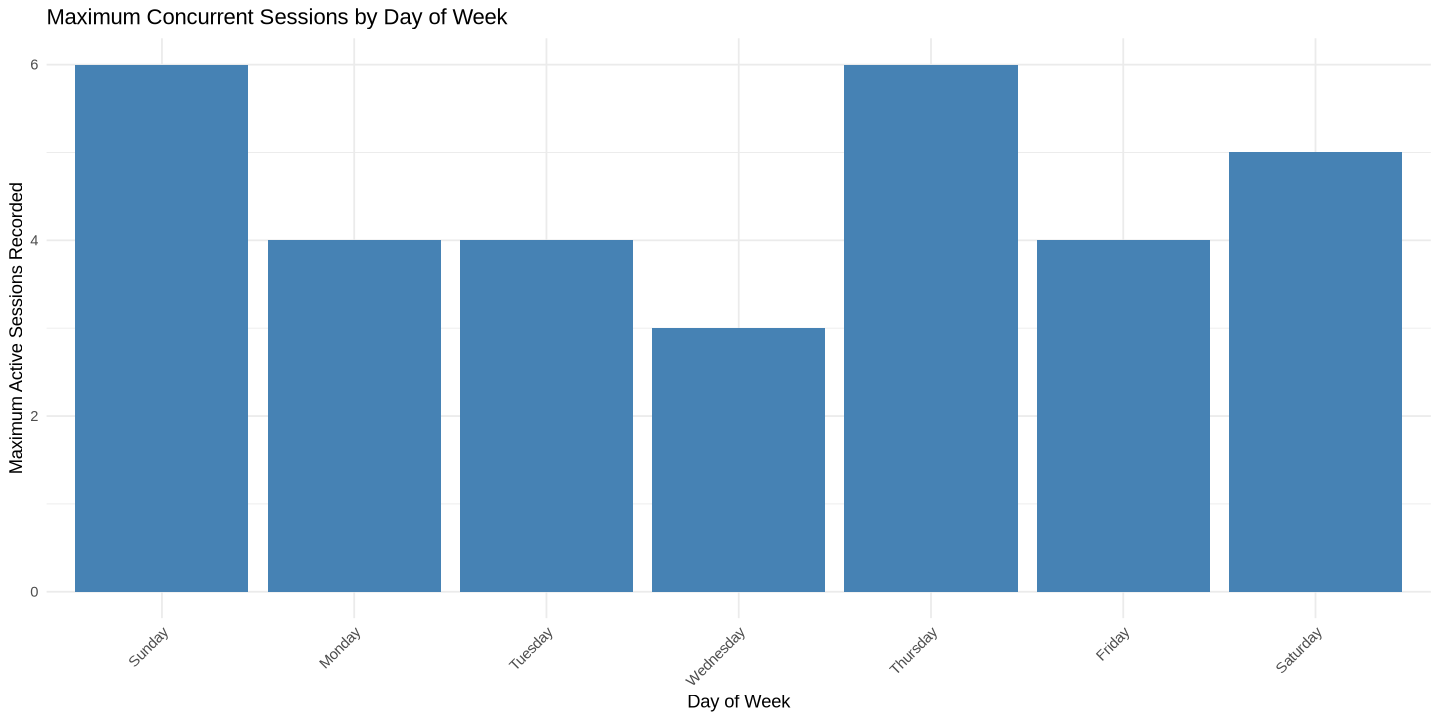

In [41]:
# plot : maximumu concurrent seesions by the day of week

# Compute max active sessions per day_of_week
max_sessions <- concurrent_sessions %>%
  group_by(day_of_week) %>%
  summarise(max_active_sessions = max(active_sessions, na.rm = TRUE)) %>%
  ungroup() %>%
  mutate(day_of_week = factor(day_of_week,
                             levels = c('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday')))

# Plot
maxconcurrent_weekday<-ggplot(max_sessions, aes(x = day_of_week, y = max_active_sessions)) +
  geom_col(fill = "steelblue") +
  labs(title = "Maximum Concurrent Sessions by Day of Week",
       x = "Day of Week",
       y = "Maximum Active Sessions Recorded") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
maxconcurrent_weekday


The code below visualizes the relationship between the hour of the day and the number of active sessions using KNN regression predictions. First, it uses the trained final KNN model (final_knn_fit) to predict the number of active sessions for each row in the training data (sessions_train). These predictions are combined with the original data using bind_cols(). Then, it counts how many observations occur at each hour using count(hour), storing the result in count_data, and merges this count back into the predictions dataframe to use as a visual cue in the plot.

Warning message:
“Removed 502 rows containing missing values or values outside the scale range
(`geom_point()`).”


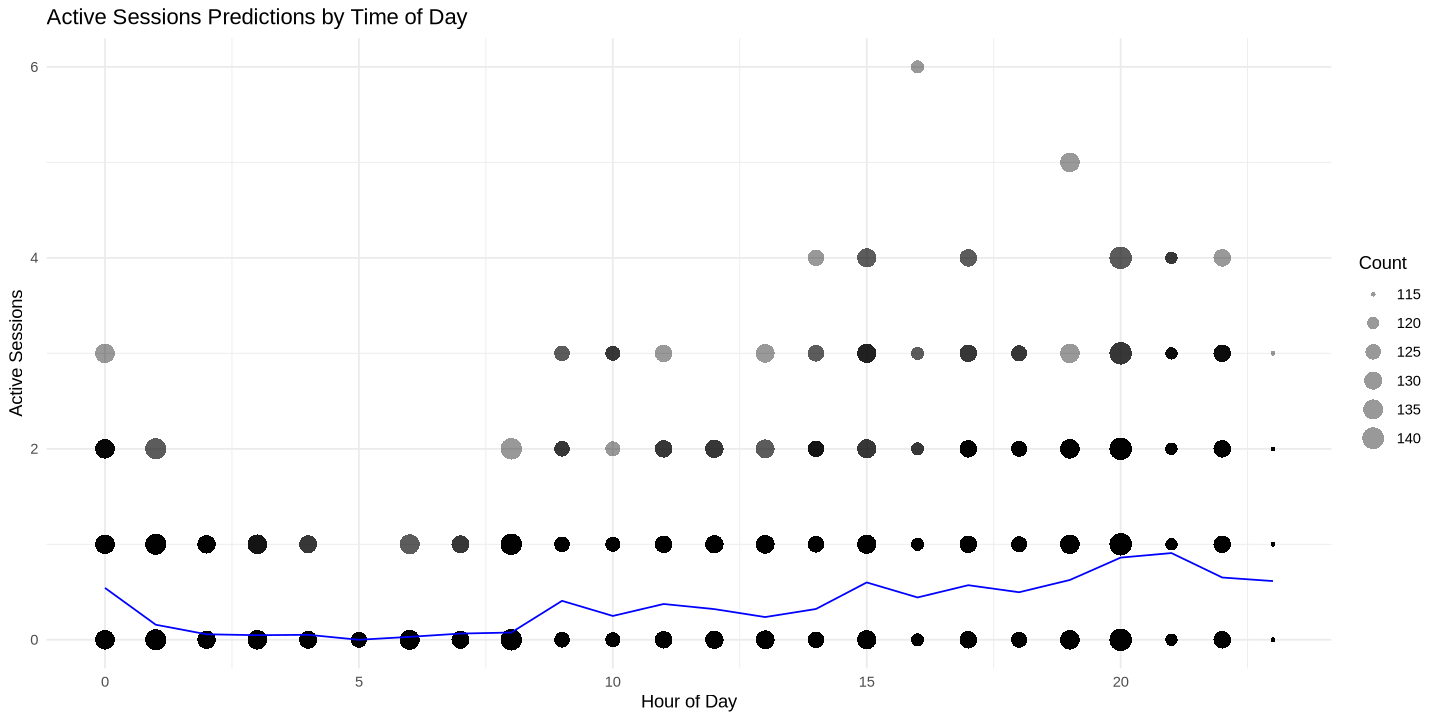

In [53]:
# active sessions per hour
# calculate sessions preds
sessions_preds<-predict(final_knn_fit, new_data=sessions_train)|>
bind_cols(sessions_train)

# Calculate counts for each hour to size points
count_data <- sessions_preds|>
  count(hour)

# Merge counts back to sessions_preds
sessions_preds_counts <- sessions_preds|>
  left_join(count_data, by = "hour")

# Plot
sessions_data_plot<-ggplot(sessions_preds_counts, aes(x = hour, y = active_sessions)) +
  geom_point(aes(size = n), alpha = 0.4, shape = 16, fill = "black") +
  geom_line(aes(y = .pred), color = "blue") +
  scale_size_continuous(name = "Count") +
  labs(title = "Active Sessions Predictions by Time of Day",
       x = "Hour of Day",
       y = "Active Sessions") +
  theme_minimal() +
  theme(legend.position = "right")
sessions_data_plot

DISCUSSION:

WHAT WE WERE SUPPOSED TO FIND:
Our project set out to investigate when peak usage occurs on a gaming platform by analyzing session data, with the goal of forecasting demand—specifically, identifying time windows with high numbers of concurrent users. This helps determine how many game licenses need to be available at different times to meet demand without over-provisioning.

SUMMARY OF FINDINGS

DAY OF THE WEEK TRANDS:
The bar plot above shows the maximum number of concurrent sessions recorded for each day of the week. Sunday and Thursday stand out with the highest peak concurrent sessions, reaching 6. Saturday also shows elevated usage. Wednesday has the lowest peak, indicating lighter midweek traffic. This strongly suggests a weekend effect, with heavier usage on days when users are more likely to be off school or work. The high Thursday value may reflect users starting their weekend gaming earlier.

HOURLY SESSION TRENDS:
The dot plot above illustrates the distribution of active sessions by hour of day, with dot size indicating how frequently certain session levels occur. Very low activity is observed during early morning hours (12 AM–8 AM). Activity begins climbing in the late morning, rises steadily into the afternoon, and peaks between 6 PM and 10 PM. The single highest activity is centered around 8 PM, aligning with common evening leisure hours. The blue line overlay helps highlight the average trend, reinforcing that evenings are consistently the busiest period regardless of day.

SESSION DURATION TRENDS:
We also examined how long sessions last during different parts of the day: Longer gameplay sessions tend to occur in the afternoon and evening, when users have more uninterrupted time. Weekends (especially Saturday and Sunday) feature not only more sessions, but longer ones, suggesting immersive play. This finding helps further justify targeting infrastructure scaling around these time windows.

AVERAGE DURATION BY THE DAY:
Although not shown in the images above, we also analyzed average session duration per day: Friday and Saturday had the longest average play times.
Sunday had many sessions, but they were slightly shorter—possibly due to users preparing for the week ahead.



WAS THIS EXPECTED?

Given that people usually go to sleep between midnight and the early hours of the morning, it makes natural that user activity would be quite low during the night. Usage naturally increases as more people log in during the day. The late afternoon and evening peak, particularly between 6 and 10 p.m., is in line with typical patterns of digital usage, when people use entertainment platforms after work or school. Additionally, we anticipated that the time of day by itself would be a powerful indicator of user activity, and it was. However, we discovered that the hour of the day alone was insufficient to adequately account for all usage patterns. For instance, on some days, particularly, the KNN model understated some of the hours of high demand. This points to some underfitting, as the model was unable to adequately represent the intricacy of user behavior based solely on time. It supported our hypothesis that other factors, such as the day of the week, are also quite important. We therefore expected that treating weekdays and weekends differently would be crucial, and this proved to be the case. Weekday usage patterns were more moderate and dispersed, but weekend usage peaks were more intensive and concentrated. We were better able to comprehend how user involvement changes based on when people are most likely to have spare time thanks to this distinction.


IMPACT OF FINDINGS:

These findings can have direct operational impact:

License Planning: Knowing peak usage hours allows organizations to provision just enough licenses to meet demand without unnecessary over-purchasing.

Scheduling: Staff or system resources (e.g., load balancing) can be optimized around high-traffic time windows.

Monitoring & Scaling: Predictive models could be used in real time to trigger alerts or auto-scaling behaviors in digital environments.

REFERENCES:

1. Get date-time in a different time zone — with_tz. (2025). Tidyverse.org. https://lubridate.tidyverse.org/reference/with_tz.html

2. Guide to Logical Operators in R (OR, NOT and AND in R) | Built In. (n.d.). Builtin.com. https://builtin.com/data-science/and-in-r

‌

‌
